In [1]:
import imageio                                       
import glob 
import numpy as np                    
import matplotlib.pyplot as plt
%matplotlib inline

from model.main import MMSR  
from utils.utils import downsample,bicubic                        
from utils.plots import plot_result


###### load data                                 
target_imgs = []
guide_imgs =  []
for target_path in glob.glob("./data/samples/target/*.png"):  
    target_imgs.append(imageio.imread(target_path))  
for guide_path in glob.glob("./data/samples/guide/*.png"):    
    guide_imgs.append(imageio.imread(guide_path)) 
    
target_imgs = np.array(target_imgs)                  
guide_imgs = np.array(guide_imgs)                    


####### define parameters  
params = {'img_idxs' : [],                          # specify images to process, if empty process all            
          'scale': 4,                               # SR factor, 4 or 8
          
          'loss': 'l1', 
          'optim': 'adam',
          'lr': 0.002,    
          
          'weights_regularizer': [0.0005, 0, 0, 0], # weight decay with factor 0.0005 is adopted on the guide branch, following P2P            
          'batch_size': 1,                          
          'iteration': 1,                                 
          'epoch': 1000,                            
         }

####### Porcessing 1/13 ########


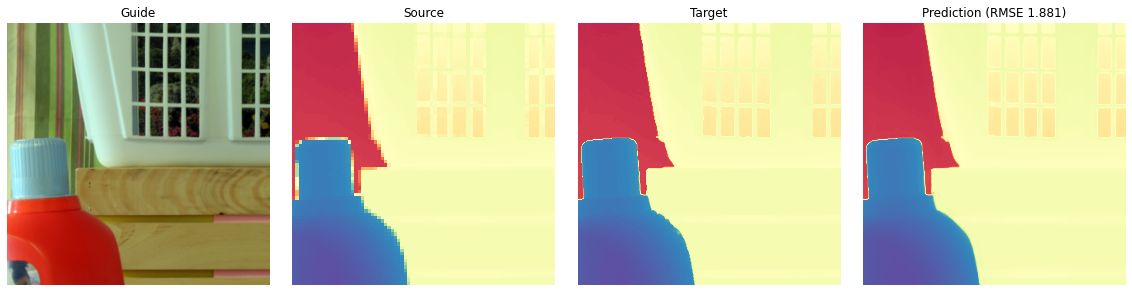

MSE: 3.536  ---  RMSE: 1.881  ---  MAE: 0.718



####### Porcessing 2/13 ########


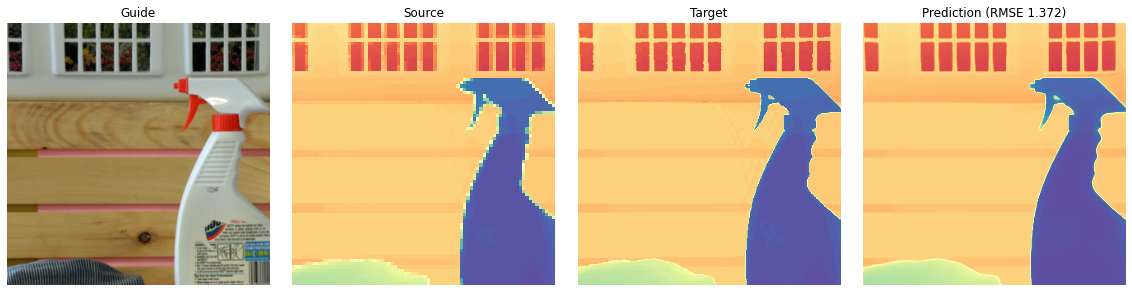

MSE: 1.882  ---  RMSE: 1.372  ---  MAE: 0.486



####### Porcessing 3/13 ########


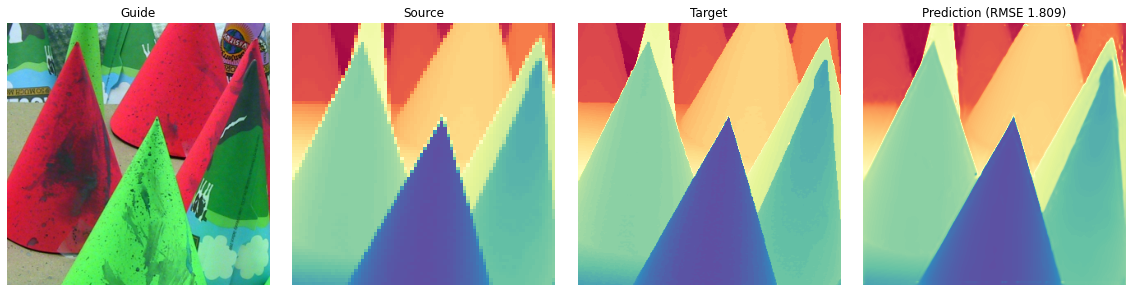

MSE: 3.272  ---  RMSE: 1.809  ---  MAE: 0.702



####### Porcessing 4/13 ########


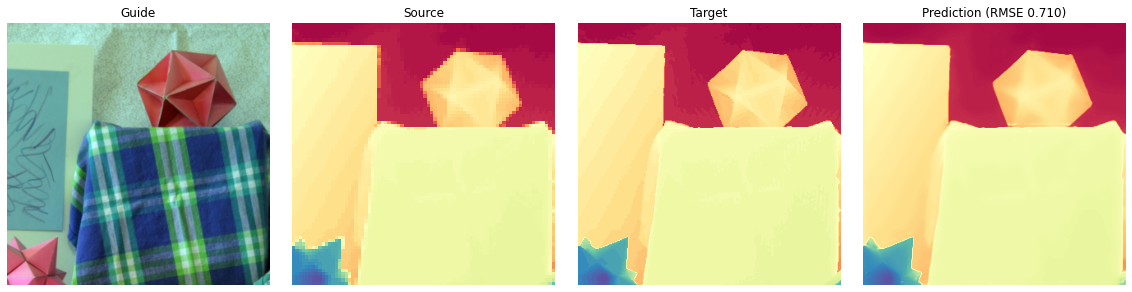

MSE: 0.504  ---  RMSE: 0.710  ---  MAE: 0.319



####### Porcessing 5/13 ########


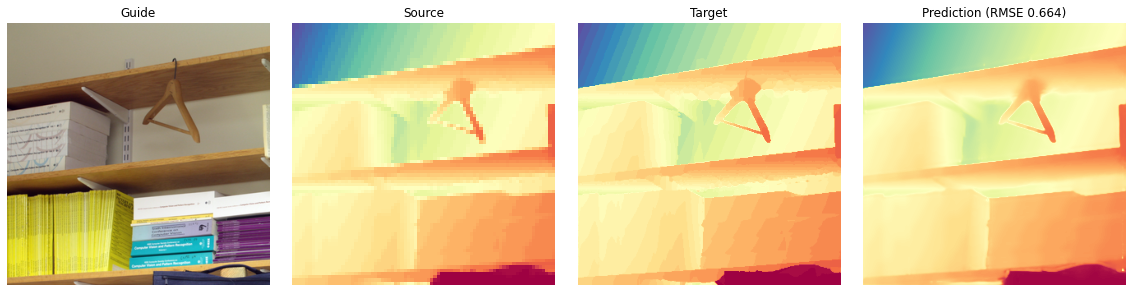

MSE: 0.441  ---  RMSE: 0.664  ---  MAE: 0.368



####### Porcessing 6/13 ########


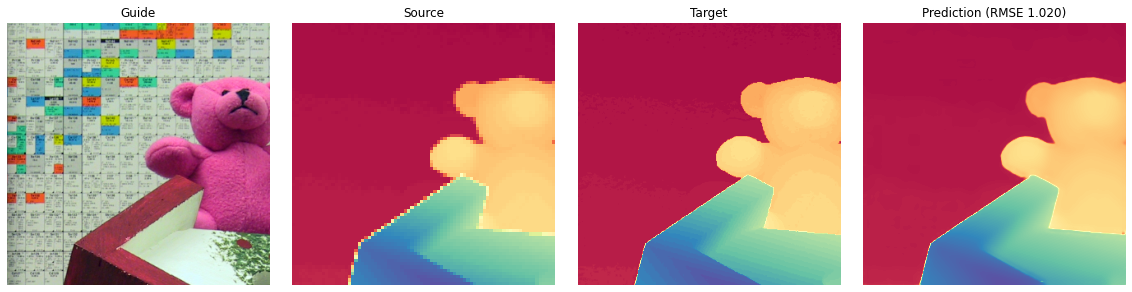

MSE: 1.041  ---  RMSE: 1.020  ---  MAE: 0.408



####### Porcessing 7/13 ########


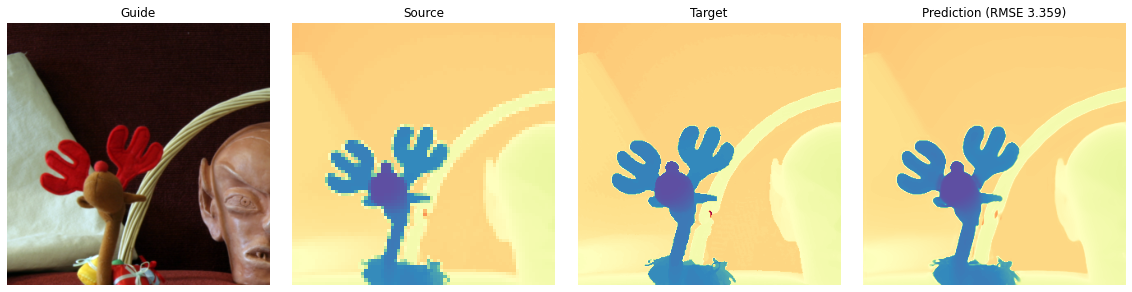

MSE: 11.282  ---  RMSE: 3.359  ---  MAE: 0.867



####### Porcessing 8/13 ########


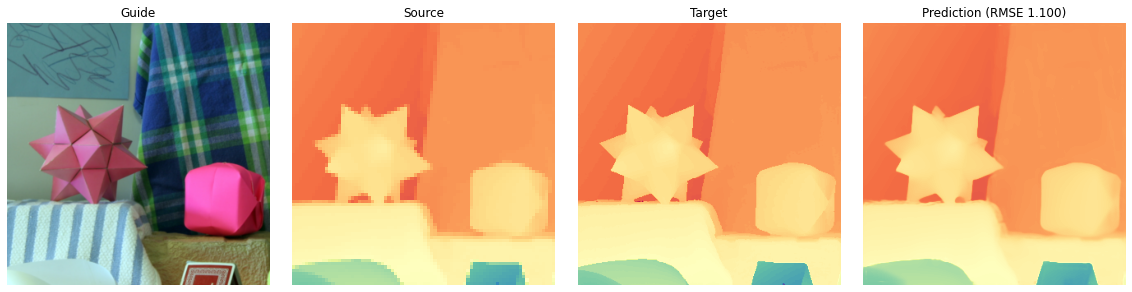

MSE: 1.210  ---  RMSE: 1.100  ---  MAE: 0.423



####### Porcessing 9/13 ########


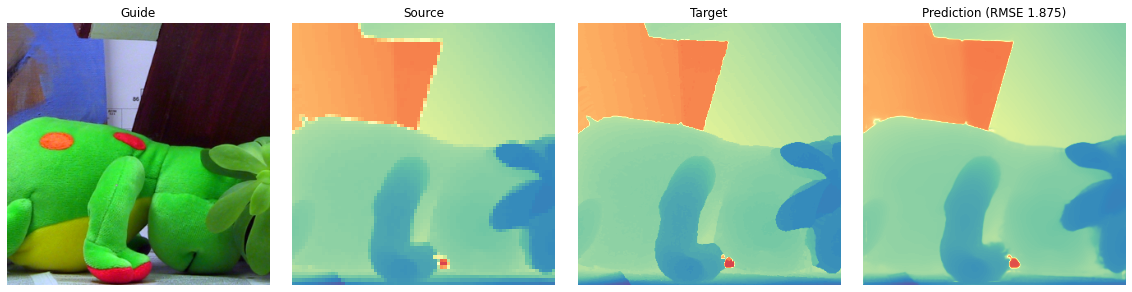

MSE: 3.517  ---  RMSE: 1.875  ---  MAE: 0.667



####### Porcessing 10/13 ########


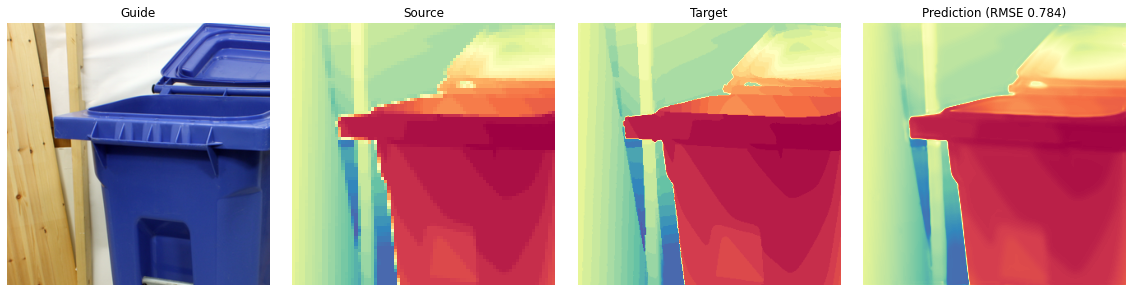

MSE: 0.615  ---  RMSE: 0.784  ---  MAE: 0.354



####### Porcessing 11/13 ########


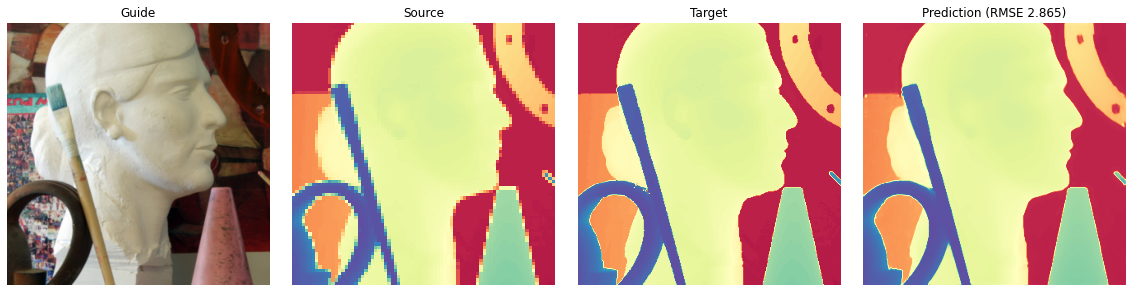

MSE: 8.211  ---  RMSE: 2.865  ---  MAE: 0.883



####### Porcessing 12/13 ########


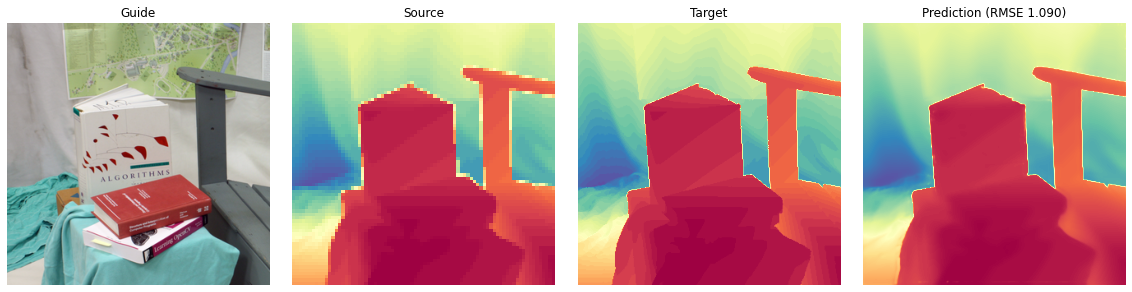

MSE: 1.187  ---  RMSE: 1.090  ---  MAE: 0.425



####### Porcessing 13/13 ########


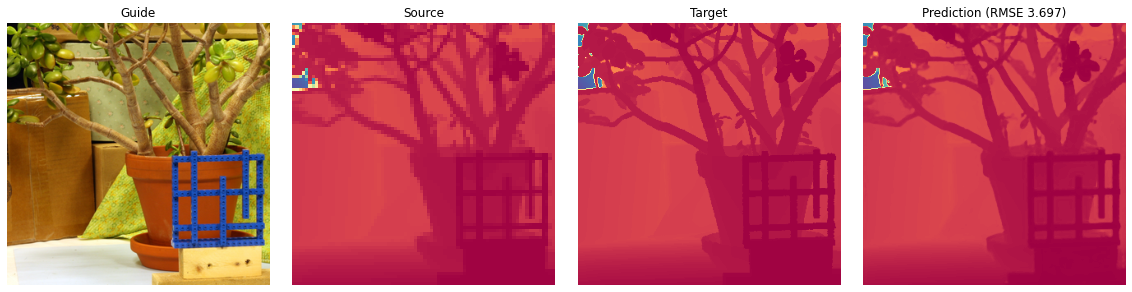

MSE: 13.664  ---  RMSE: 3.697  ---  MAE: 0.868





In [2]:
if len(params['img_idxs'])==0:
    idxs = np.array(range(0,target_imgs.shape[0]))
else:
    idxs = params['img_idxs']


for n_image,idx in enumerate(idxs):
    print("####### Porcessing {}/{} ########".format(n_image+1,len(idxs)))

    guide_img = guide_imgs[idx]
    guide_img = guide_img.transpose(2,0,1) 
    target_img = target_imgs[idx]                                          
    source_img = downsample(target_img,params['scale'])           
                       
    prediction = MMSR(guide_img=guide_img,source_img=source_img,params=params,target_img=target_img)
    f, ax = plot_result(guide_img,source_img,prediction,target_img)
    plt.show()
    
    if target_img is not None:
        MSE = np.mean((prediction - target_img) ** 2)
        RMSE = np.sqrt(np.mean((prediction - target_img) ** 2)) 
        MAE = np.mean(np.abs(prediction - target_img))
        print("MSE: {:.3f}  ---  RMSE: {:.3f}  ---  MAE: {:.3f}".format(MSE,RMSE,MAE))
        print("\n\n")